**Author: Prashant Jeswani Tejwani**

In [72]:
!pip install numpy
!pip install scikit-fuzzy
!pip install matplotlib

In [73]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Definir términos y variables 

Se crea un sistema de aire acondicionado de 3 niveles. El sistema ajusta la temperatura del aire acondicionado comparando la temperatura ambiente y el valor de temperatura objetivo.

La formulación de este problema sería:

**Antecedentes (Entradas):**
- Temperature: representa la temperatura ambiente de la habitación, oficina... 
- Target: representa la temperatura objetivo a la que se quiere llegar a tener.


**Consecuentes (Salidas):**
- Change: ¿Qué comando se debe elegir para ajustar la temperatura?

Los conjuntos difusos establecidos son:

                                     Temperature = [cold, warm, hot]
                                     Target = [cold, warm, hot]
                                     Change = [heat, no_change, cool] 

Si se respresenta el sistema sería como la siguiente figura:

![https://github.com/Prashant-JT/FuzzyLogic-Example/blob/master/system.PNG](system.PNG)

In [74]:
# Temperature = {cold, warm, hot}
temperature = ctrl.Antecedent(np.arange(0, 41, 0.1), 'temperature')
# Target = {cold, warm, hot}
target = ctrl.Antecedent(np.arange(0, 41, 0.1), 'target')
# Change = {heat, no_change, cool} 
change = ctrl.Consequent(np.arange(0, 41, 1), 'change')

### 2. Construir las funciones de pertenencia

A continuación, se crean las funciones de pertenencia:

In [75]:
# Membership functions 
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 10, 21])
temperature['warm'] = fuzz.trimf(temperature.universe, [18, 20, 28])
temperature['hot'] = fuzz.trimf(temperature.universe, [25, 30, 40])

target['cold'] = fuzz.trimf(target.universe, [0, 10, 22])
target['warm'] = fuzz.trimf(target.universe, [18, 20, 30])
target['hot'] = fuzz.trimf(target.universe, [25, 30, 40])

In [76]:
change['cool'] = fuzz.trimf(change.universe, [0, 0, 21])
change['no_change'] = fuzz.trimf(change.universe, [18, 25, 28])
change['heat'] = fuzz.trimf(change.universe, [26, 40, 40])

c:\python\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\python\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\python\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


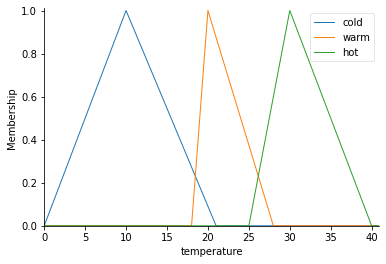

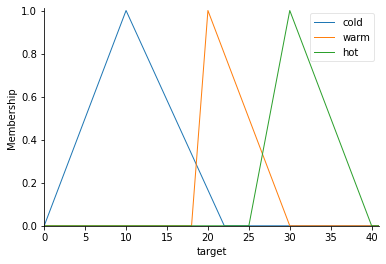

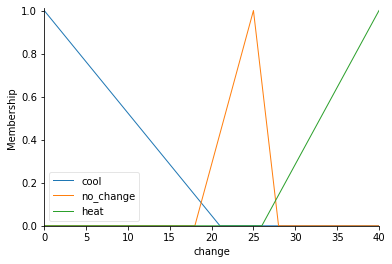

In [77]:
temperature.view()
target.view()
change.view()

plt.show()

### 3. Construir las reglas de la base de conocimientos

Se define la relación difusa entre las variables de entrada y salida creando el conjunto de reglas en la base de conocimientos.

In [78]:
# Create rules
rule1 = ctrl.Rule(temperature['cold'] | temperature['warm'] & target['hot'] , change['heat'])
rule2 = ctrl.Rule(temperature['cold'] & target['warm'], change['heat'])
rule3 = ctrl.Rule(temperature['hot'] & target['warm'], change['cool'])
rule4 = ctrl.Rule(temperature['warm'] | temperature['hot'] & target['cold'], change['cool'])
rule5 = ctrl.Rule(temperature['warm'] | temperature['hot'] & target['hot'], change['heat'])
rule6 = ctrl.Rule(temperature['cold'] & target['cold'], change['no_change'])
rule7 = ctrl.Rule(temperature['hot'] & target['hot'], change['no_change'])
rule8 = ctrl.Rule(temperature['warm'] & target['warm'], change['no_change'])

Finalmente, se crea el sistema:

In [79]:
# Create system
temperature_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
air_conditioner = ctrl.ControlSystemSimulation(temperature_ctrl)

### Uso

Si le pedimos a al sistema que diga el comando a ejecutar para el siguiente ejemplo, éste nos recomendaría que el comando sea 'cool' para que se ajuste la temperatura de la habitación.

9.488888888888885


c:\python\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


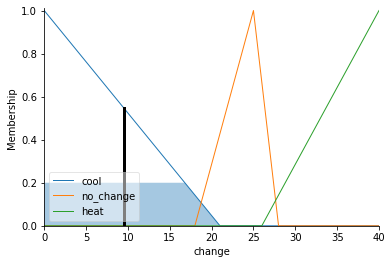

In [80]:
# Pass example inputs to the ControlSystem 
air_conditioner.input['temperature'] = 38
air_conditioner.input['target'] = 25

# Compute
air_conditioner.compute()

# Print result
print(air_conditioner.output['change'])
change.view(sim=air_conditioner)

plt.show()